### 311 Requests

In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

We’re going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from NYC Open Data. Download the file 311-service-requests.csv.



In [2]:
complaints = pd.read_csv('311-service-requests.csv')


/Users/nelzor/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Depending on your pandas version, you might see an error like this. This means that it’s encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
For now we’re going to ignore it and hope we don’t run into a problem, but in the long run we’d need to investigate this warning.

When you print a large dataframe, it will only show you the first few rows. If you don’t see this, don’t panic! The default behavior for large dataframes changed between pandas 0.12 and 0.13. Previous to 0.13 it would show you a summary of the dataframe. This includes all the columns, and how many non-null values there are in each column.

In [3]:
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,NaN,NaN,NaN,Na

In [4]:
#to select a column
complaints['Complaint Type']


0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

In [5]:
#first 5 rows
complaints[:5]


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [6]:
complaints['Complaint Type'][:5]


0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

In [7]:
#multiple columns
complaints[['Complaint Type', 'Borough']]


,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


In [8]:
#first 10
complaints[['Complaint Type', 'Borough']][:10]


,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


In [9]:
#most common complaint?
complaints['Complaint Type'].value_counts()


HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
X-Ray Machine/Equipment               1
DHS Income Savings Requirement        1
Open Flame Permit                     1
Trans Fat                             1
Ferry Permit                          1
Name: Complaint Type, Length: 165, dtype: int64

In [10]:
complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

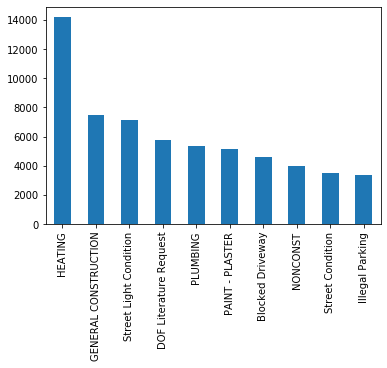

In [11]:
#lets plot them
complaint_counts[:10].plot(kind='bar')


In [12]:
complaints[:5]


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


To get the noise complaints, we need to find the rows where the “Complaint Type” column is “Noise - Street/Sidewalk”. 

In [13]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013.0,171076.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577.0,140964.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


In [14]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"


0          True
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

In [15]:
#You can also combine more than one condition with the & operator like this:

is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937.0,170310.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366.0,180388.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925.0,203271.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,Precinct,Closed,10/31/2013 06:02:58 AM,10/30/2013 10:23:20 PM,01 BROOKLYN,BROOKLYN,991895.0,171051.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,CHURCH AVENUE,EAST 2 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 04:38:25 AM,10/30/2013 10:26:28 PM,12 BROOKLYN,BROOKLYN,990144.0,173511.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"


In [16]:
#or if we wanted just a few columns
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]


,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


In [17]:
#so which borough has the most noise complaints
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

In [18]:
#but let's divide by total number of complaints
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()
noise_complaint_counts / complaint_counts

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

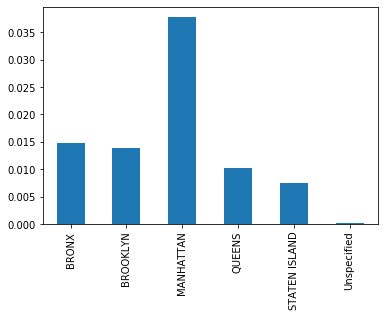

In [19]:
#plot it!

(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')


So Manhattan really does complain more about noise than the other boroughs! Neat.

Now, let's clean up some messy data

In [20]:
requests = pd.read_csv('311-service-requests.csv')


We’re going to look at a few columns here. I know already that there are some problems with the zip code, so let’s look at that first.
To get a sense for whether a column has problems, I usually use .unique() to look at all its values. If it’s a numeric column, I’ll instead plot a histogram to get a sense of the distribution.
When we look at the unique values in “Incident Zip”, it quickly becomes clear that this is a mess.

Some of the problems:

Some have been parsed as strings, and some as floats
There are nans
Some of the zip codes are 29616-0759 or 83
There are some N/A values that pandas didn’t recognize, like ‘N/A’ and ‘NO CLUE’
What we can do:

Normalize ‘N/A’ and ‘NO CLUE’ into regular nan values
Look at what’s up with the 83, and decide what to do
Make everything strings

In [21]:
requests['Incident Zip'].unique()


array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

In [22]:
#fix string/float problem

na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})
requests['Incident Zip'].unique()


array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [23]:
#some zips have dashes
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
len(requests[rows_with_dashes])

5

In [24]:
requests[rows_with_dashes]


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
29136,26550551,10/24/2013 06:16:34 PM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,False Advertising,NaN,77092-2016,2700 EAST SELTICE WAY,EAST SELTICE WAY,NaN,NaN,NaN,NaN,NaN,HOUSTON,NaN,NaN,Assigned,11/13/2013 11:15:20 AM,10/29/2013 11:16:16 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30939,26548831,10/24/2013 09:35:10 AM,NaN,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,55164-0737,P.O. BOX 64437,64437,NaN,NaN,NaN,NaN,NaN,ST. PAUL,NaN,NaN,Assigned,11/13/2013 02:30:21 PM,10/29/2013 02:31:06 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70539,26488417,10/15/2013 03:40:33 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,11549-3650,365 HOFSTRA UNIVERSITY,HOFSTRA UNIVERSITY,NaN,NaN,NaN,NaN,NaN,HEMSTEAD,NaN,NaN,Assigned,11/30/2013 01:20:33 PM,10/16/2013 01:21:39 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85821,26468296,10/10/2013 12:36:43 PM,10/26/2013 01:07:07 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Debt Not Owed,NaN,29616-0759,PO BOX 25759,BOX 25759,NaN,NaN,NaN,NaN,NaN,GREENVILLE,NaN,NaN,Closed,10/26/2013 09:20:28 AM,10/26/2013 01:07:07 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89304,26461137,10/09/2013 05:23:46 PM,10/25/2013 01:06:41 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Harassment,NaN,35209-3114,600 BEACON PKWY,BEACON PKWY,NaN,NaN,NaN,NaN,NaN,BIRMINGHAM,NaN,NaN,Closed,10/25/2013 02:43:42 PM,10/25/2013 01:06:41 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#let's truncate them
long_zip_codes = requests['Incident Zip'].str.len() > 5
requests['Incident Zip'][long_zip_codes].unique()


array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [26]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)


In [27]:
#let's check for 00000 zips
requests[requests['Incident Zip'] == '00000']


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
42600,26529313,10/22/2013 02:51:06 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,NaN,00000,EWR EWR,EWR,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/07/2013 09:53:51 AM,10/23/2013 09:54:43 AM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60843,26507389,10/17/2013 05:48:44 PM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,Street,00000,1 NEWARK AIRPORT,NEWARK AIRPORT,NaN,NaN,NaN,NaN,NaN,NEWARK,NaN,NaN,Assigned,12/02/2013 11:59:46 AM,10/18/2013 12:01:08 PM,0 Unspecified,Unspecified,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#set them to nan
zero_zips = requests['Incident Zip'] == '00000'
requests['Incident Zip'][zero_zips] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
#cool, let's see where we are now
unique_zips = requests['Incident Zip'].unique()
unique_zips

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [30]:
zips = requests['Incident Zip']
# Let's say the zips starting with '0' and '1' are okay, for now. (this isn't actually true -- 13221 is in Syracuse, and why?)
is_close = zips.str.startswith('0') | zips.str.startswith('1')
# There are a bunch of NaNs, but we're not interested in them right now, so we'll say they're True
is_far = ~(is_close.fillna(True).astype(bool))
zips[is_far]

18        NaN
26        NaN
54        NaN
86        NaN
188       NaN
         ... 
110931    NaN
110967    NaN
110993    NaN
110995    NaN
111036    NaN
Name: Incident Zip, Length: 12278, dtype: object

In [31]:
requests[is_far][['Incident Zip', 'Descriptor', 'City']].sort('Incident Zip')


AttributeError: 'DataFrame' object has no attribute 'sort'